In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import pylab as pl
%matplotlib inline

In [93]:
def generateTwoDisks():
    angle = np.arange(0, np.pi*2, 0.15)

    r1 = 50
    r2 = 20
    size = angle.shape[0]

    x1 = r1 * np.cos(angle)
    y1 = r1 * np.sin(angle)

    x2 = r2 * np.cos(angle)
    y2 = r2 * np.sin(angle)


    EACH = 10
    X = np.zeros(2*size*EACH)
    Y = np.zeros(2*size*EACH)
    label = np.zeros(2*size*EACH,dtype=int)
    label[size*EACH:] = np.ones(size*EACH)

    cov = [[5, 0], [0, 5]]  # diagonal covariance
    for i in range(size):
        X[i*EACH:(i+1)*EACH],Y[i*EACH:(i+1)*EACH] = np.random.multivariate_normal([x1[i],y1[i]], cov, EACH).T
        X[(i+size)*EACH:(i+size+1)*EACH],Y[(i+size)*EACH:(i+size+1)*EACH] = np.random.multivariate_normal([x2[i],y2[i]], cov, EACH).T
    return X,Y,label,"Disks"

def generateTwoGaussian():
    mean1 = [-2, -2]
    cov1 = [[1, 0], [0, 1]]  # diagonal covariance
    mean2 = [2,2]
    cov2 = [[1, 0], [0, 1]]  # diagonal covariance

    # data
    x = np.zeros(200)
    y = np.zeros(200)
    label = np.zeros(200,dtype=int)
    x[:100], y[:100] = np.random.multivariate_normal(mean1, cov1, 100).T
    x[100:], y[100:] = np.random.multivariate_normal(mean2, cov2, 100).T
    label[100:] = np.ones(100)
    return x,y,label,"Gaussian"

def generateTwoParabola():
    x1 = np.linspace(-10, 10, 40)
    y1 = .22*x1**2 + .024*x1 + .04  

    x2 = np.linspace(0, 20, 40)
    y2 = -.2*(x2-10)**2 - .024*(x2-10) + 35

    size = x1.shape[0]
    EACH = 10
    X = np.zeros(2*size*EACH)
    Y = np.zeros(2*size*EACH)
    label = np.zeros(2*size*EACH,dtype=int)
    label[size*EACH:] = np.ones(size*EACH)

    cov = [[1, 0], [0, 1]]  # diagonal covariance
    for i in range(size):
        X[i*EACH:(i+1)*EACH],Y[i*EACH:(i+1)*EACH] = np.random.multivariate_normal([x1[i],y1[i]], cov, EACH).T
        X[(i+size)*EACH:(i+size+1)*EACH],Y[(i+size)*EACH:(i+size+1)*EACH] = np.random.multivariate_normal([x2[i],y2[i]], cov, EACH).T
    return X,Y,label,"Parabolas"

import scipy.io as io
def generateConcentric():
    concentric = io.loadmat("Concentric_rings.mat")
    X = concentric['X'][:,[0,1]]
    Y = concentric['Y'][:,0]
    Y = (Y==1)
    return X[:,0],X[:,1],Y,"Concentric"

def generateXOR():
    mean1 = [-2, -2]
    cov1 = [[1, 0], [0, 1]]  # diagonal covariance
    mean2 = [2,2]
    cov2 = [[1, 0], [0, 1]]  # diagonal covariance

    # data
    X = np.zeros((400,2))
    y = np.zeros(400,dtype=int)
    X[:100] = np.random.multivariate_normal(mean1, cov1, 100)
    X[100:200] = np.random.multivariate_normal(mean2, cov2, 100)
    
    
    mean3 = [2, -2]
    cov3 = [[1, 0], [0, 1]]  # diagonal covariance
    mean4 = [-2, 2]
    cov4 = [[1, 0], [0, 1]]  # diagonal covariance

    X[200:300] = np.random.multivariate_normal(mean3, cov3, 100)
    X[300:] = np.random.multivariate_normal(mean4, cov4, 100)
    y[200:] = np.ones(200)
    
    return X[:,0],X[:,1],y,"XOR"


def plotData(x,y,label,dataName):
    plt.plot(x[label==0], y[label==0], 'bo')
    plt.plot(x[label==1], y[label==1], 'ro')
    plt.axis('equal')
    plt.savefig(dataName+'.jpg')
    plt.show()
colors = ['b', 'r', 'g', 'w', 'y']

def plotData2(x,y,label,dataName):
    num = len(np.unique(sorted(label)))
    for i in range(num):
        plt.plot(x[label==i], y[label==i], colors[i%5]+'x')
    plt.axis('equal')
    plt.savefig('images/'+dataName+'.jpg')
    plt.show()

<h2 style="color:red"> __Prototyping__ </h2>

In [94]:
from sklearn.cluster import KMeans
def Prototyping(dataset,numP):
    kmeans = KMeans(init='k-means++',n_clusters=numP)
    kmeans.fit(dataset)

#     print 'initiated clustered data:'
    plotData2(X,Y,kmeans.labels_,'a')

    centers = kmeans.cluster_centers_
    clu = kmeans.labels_
    a = np.zeros(numP,dtype=int)
    for i in range(len(clu)):
        a[clu[i]] += 1
    print a
    return centers

def WeightedPrototyping(dataset,numP):
    kmeans = KMeans(init='k-means++',n_clusters=numP)
    kmeans.fit(dataset)

#     print 'initiated clustered data:'
    plotData2(X,Y,kmeans.labels_,'a')

    centers = kmeans.cluster_centers_
    clu = kmeans.labels_
    a = np.zeros(numP,dtype=int)
    for i in range(len(clu)):
        a[clu[i]] += 1
    return centers,a


<h2 style="color:red"> Graph Construction </h2>


In [95]:



def distance2(p1,p2):
    return (p1[0]-p2[0])**2+(p1[1]-p2[1])**2
def similarity(p1,p2):
    sigma = 10
    return np.exp((-distance2(p1,p2)**2)/(2*(sigma**2)))


def constructBipartite(dataset,numS,centers,numP):
    N = numS + numP
    # constructing graph
    W = np.zeros((N,N))
    for i in range(numS):
        for j in range(numP):
            W[i,j+numS] = similarity((dataset[i,0],dataset[i,1]),(centers[j,0],centers[j,1]))
            W[j+numS,i] = W[i,j+numS]

    # construct laplacian
    D = np.diag(np.dot(W,np.ones(N)))
    L = D - W
    return W,D,L


<h2 style="color:red">__normalized laplacian method - Ng & Jordan (2)__</h2>

In [96]:
def normalized3(W,D,L):
    N = W.shape[0]
    d = np.diag(D)
    d1 = 1/np.sqrt(d)
    D1 = np.diag(d1)
    Lsym = np.dot(np.dot(D1,L),D1)
    eigenValues , eigenVectors = np.linalg.eig(Lsym)
    eigenValues = eigenValues.real
    idx = eigenValues.argsort()
    eigenValues = eigenValues[idx]
    eigenVectors = eigenVectors[:,idx]
    return eigenValues,eigenVectors

In [97]:
def SCORE(W,D,L):
    N = W.shape[0]
    eigenValues , eigenVectors = np.linalg.eig(W)
    eigenValues = eigenValues.real
    idx = eigenValues.argsort()
    eigenValues = eigenValues[idx]
    eigenVectors = eigenVectors[:,idx]
    for i in xrange(1,eigenValues.shape[0]):
        eigenVectors[:,i] = eigenVectors[:,1]
    return eigenValues,eigenVectors

In [98]:
def eigPlot(eigenValues,eigenVectors,label,model,name):
    f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
    N = eigenValues.shape[0]
    #1
    eig0 = (eigenVectors[:,0])[label == 0]
    eig1 = (eigenVectors[:,0])[label == 1]
    ax1.plot(range(len(eig0)),eig0,'bx')
    ax1.plot(range(len(eig0),N),eig1,'rx')
    ax1.text(.5,.9,'1st eigenVector',
            horizontalalignment='center',
            transform=ax1.transAxes)
    #2
    eig0 = (eigenVectors[:,1])[label == 0]
    eig1 = (eigenVectors[:,1])[label == 1]
    ax2.plot(range(len(eig0)),eig0,'bx')
    ax2.plot(range(len(eig0),N),eig1,'rx')
    ax2.text(.5,.9,'2nd eigenVector',
            horizontalalignment='center',
            transform=ax2.transAxes)
    #3
    eig0 = (eigenVectors[:,2])[label == 0]
    eig1 = (eigenVectors[:,2])[label == 1]
    ax3.plot(range(len(eig0)),eig0,'bx')
    ax3.plot(range(len(eig0),N),eig1,'rx')
    ax3.text(.5,.9,'3rd eigenVector',
            horizontalalignment='center',
            transform=ax3.transAxes)
    #4
    eig0 = (eigenVectors[:,3])[label == 0]
    eig1 = (eigenVectors[:,3])[label == 1]
    ax4.plot(range(len(eig0)),eig0,'bx')
    ax4.plot(range(len(eig0),N),eig1,'rx')
    ax4.text(.5,.9,'4th eigenVector',
            horizontalalignment='center',
            transform=ax4.transAxes)
    
    tmpname = 'images/'+name+' : eigenVectos '+model+'.jpg'
    print tmpname
    plt.savefig(tmpname)
    plt.show()
    
    
#     xt = eigenVectors[:,0]
#     yt = eigenVectors[:,1]
#     plt.plot(xt[label==0], yt[label==0], 'bo')
#     plt.plot(xt[label==1], yt[label==1], 'ro')

#     plt.title('new representation 2 '+model)
#     tmpname = 'images/'+name+' new rep 2 '+model+'.jpg'
#     print tmpname
#     plt.savefig(tmpname)
#     plt.show()
    
    
#     xt = eigenVectors[:,2]
#     yt = eigenVectors[:,3]
#     plt.plot(xt[label==0], yt[label==0], 'bo')
#     plt.plot(xt[label==1], yt[label==1], 'ro')

#     plt.title('new representation '+model)
#     tmpname = 'images/'+name+' new rep '+model+'.jpg'
#     print tmpname
#     plt.savefig(tmpname)
#     plt.show()
    
    f, (ax1, ax2) = plt.subplots(1,2)
    xt = eigenVectors[:,0]
    yt = eigenVectors[:,1]
    ax1.plot(xt[label==0], yt[label==0], 'bo')
    ax1.plot(xt[label==1], yt[label==1], 'ro')

#     ax1.title('D1 & D2')
    
    xt = eigenVectors[:,2]
    yt = eigenVectors[:,3]
    ax2.plot(xt[label==0], yt[label==0], 'bo')
    ax2.plot(xt[label==1], yt[label==1], 'ro')

#     plt.title('D3 & D4')
    tmpname = 'images/'+name+' new rep '+model+'.jpg'
    print tmpname
    plt.savefig(tmpname)
    plt.show()
    
    

    plt.plot(range(10),eigenValues[:10],'bo')
    plt.title('eigenValues '+model)
    
    tmpname = 'images/'+name+' eigenVal '+model+'.jpg'
    print tmpname
    plt.savefig(tmpname)
    plt.show()
    print eigenValues[:10]

<h1 style="color:purple">__Results__</h2>

<h2 style="color:red">__Two Gaussian__</h2>

first data:


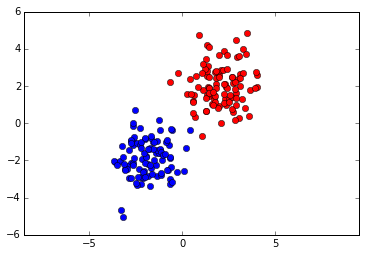

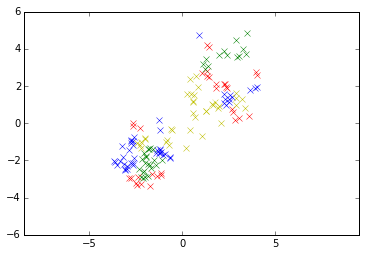

[ 8  4  7 10  8 11  5  2  2  5  5  5  3  2  3  8  3  5 12  5  9  2  4  8  5
  1  6  4  8  6  3  6  3  1  2  2  2  7  5  3]
prototypes


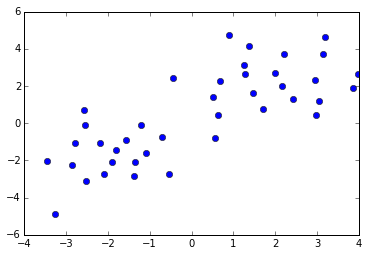

In [99]:
#prototyping
numP = 40


X,Y,label,name = generateTwoGaussian() #generateTwoDisks()
print 'first data:'
plotData(X,Y,label,name)

dataset = np.array([X, Y]).T
centers = Prototyping(dataset,numP)

print 'prototypes'
plt.plot(centers[:,0],centers[:,1],'bo')


numS = dataset.shape[0]
N = numS + numP


images/Gaussian : eigenVectos M(1).jpg


c:\Anaconda\lib\site-packages\numpy\core\numeric.py:462: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


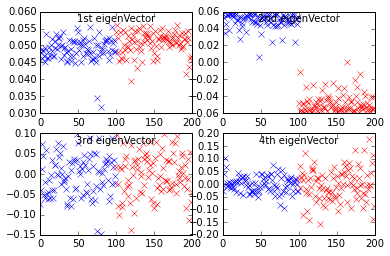

images/Gaussian new rep M(1).jpg


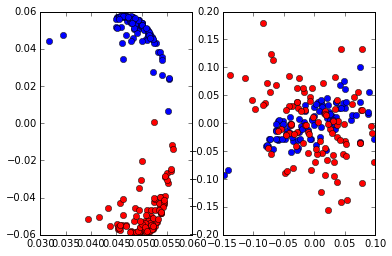

images/Gaussian eigenVal M(1).jpg


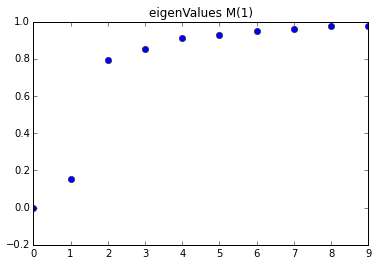

[ -5.71227098e-16   1.56183852e-01   7.93701333e-01   8.55039177e-01
   9.13390893e-01   9.30518937e-01   9.47116842e-01   9.58926832e-01
   9.73870002e-01   9.76910334e-01]


In [100]:
W,D,L = constructBipartite(dataset,numS,centers,numP)
eigenValues,eigenVectors = normalized3(W,D,L)
eigPlot(eigenValues[:numS],eigenVectors[:numS,:],label,'M(1)',name)

first data:


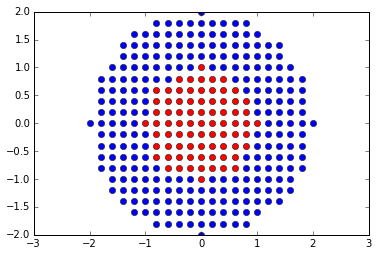

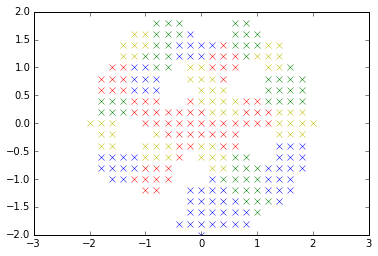

[ 8  8  6 11  6  9  8  7  8  7 10  8  9  8 10  8  8  8  7  7  8  8  6  8  7
  8  8  8  6  9  8  9  7  8  7  8  8  6  8  7]
prototypes
images/Concentric : eigenVectos M(1).jpg


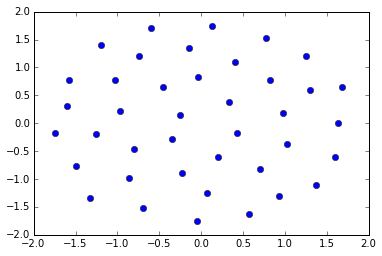

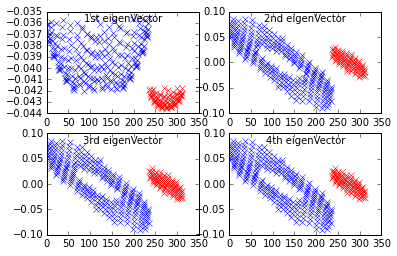

images/Concentric new rep M(1).jpg


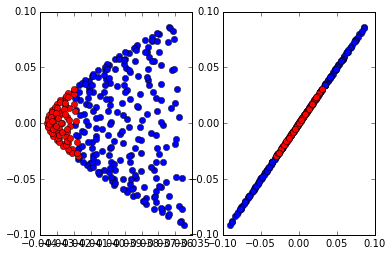

images/Concentric eigenVal M(1).jpg


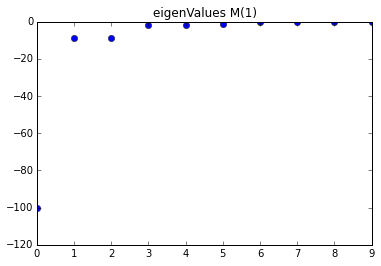

[-100.09682547   -9.0636834    -8.96690361   -1.83177874   -1.62204775
   -1.51565864   -0.4142919    -0.40274245   -0.32753335   -0.31444985]


In [109]:
#prototyping
numP = 40


X,Y,label,name = generateConcentric() #generateTwoDisks()
print 'first data:'
plotData(X,Y,label,name)

dataset = np.array([X, Y]).T
centers = Prototyping(dataset,numP)

print 'prototypes'
plt.plot(centers[:,0],centers[:,1],'bo')


numS = dataset.shape[0]
N = numS + numP

W,D,L = constructBipartite2(dataset,numS,centers,numP,label)
eigenValues,eigenVectors = SCORE(W,D,L)
eigPlot(eigenValues[:numS],eigenVectors[:numS,:],label,'M(1)',name)

In [15]:
name

'Gaussian'

<h2 style="color:red">__Two Disks__</h2>


first data:


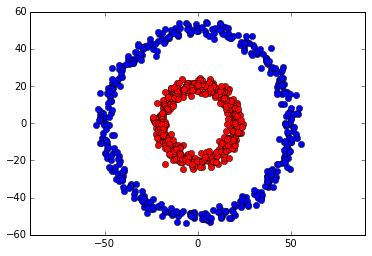

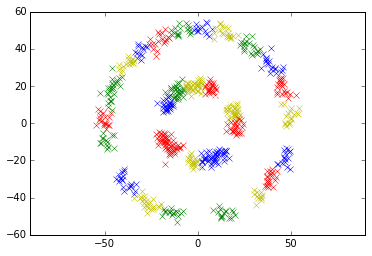

[20 21 31 32 11 13 28 15 21 33 16 18 17 35 23 12 24 20 21 18 23 20 16 16 20
 27 26 16 33 16 19 25 13 16 37 26 18 12 13 19]
prototypes


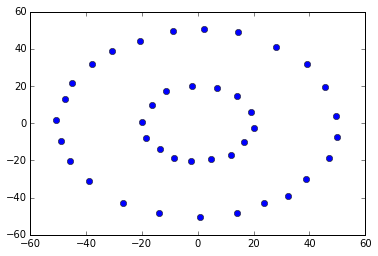

In [16]:
#prototyping
numP = 40

from sklearn.cluster import KMeans
X,Y,label,name = generateTwoDisks()
print 'first data:'
plotData(X,Y,label,name)

dataset = np.array([X, Y]).T
centers = Prototyping(dataset,numP)

print 'prototypes'
plt.plot(centers[:,0],centers[:,1],'bo')


numS = dataset.shape[0]
N = numS + numP

images/Disks : eigenVectos M(1).jpg


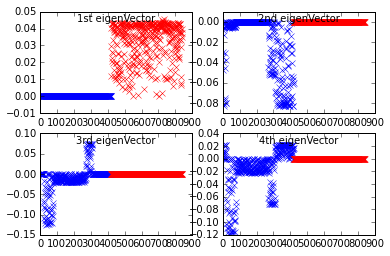

images/Disks new rep M(1).jpg


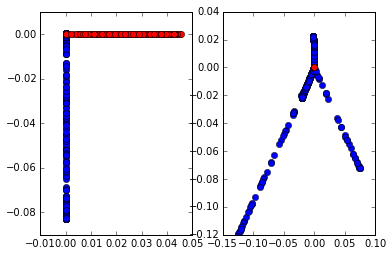

images/Disks eigenVal M(1).jpg


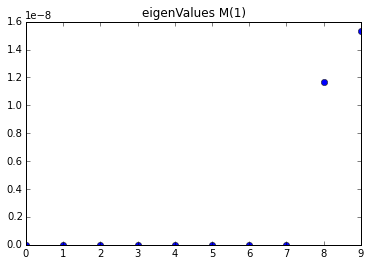

[  5.81522721e-17   4.62853402e-16   1.25590396e-15   1.43517575e-15
   2.34073897e-15   4.26590305e-13   3.48653928e-12   1.29373791e-11
   1.17041945e-08   1.52920217e-08]


In [17]:
W,D,L = constructBipartite(dataset,numS,centers,numP)
eigenValues,eigenVectors = normalized3(W,D,L)
eigPlot(eigenValues[:numS],eigenVectors[:numS,:],label,'M(1)',name)

<h2 style="color:red">__Two Parabolas__</h2>


first data:


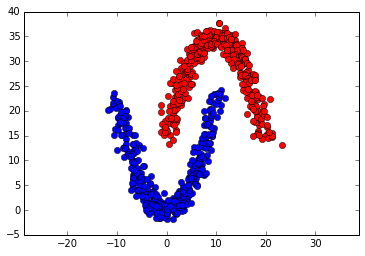

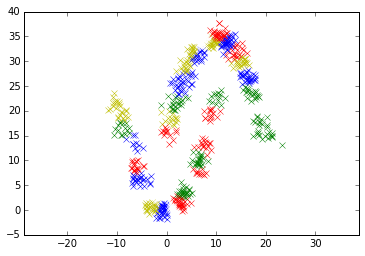

[41 22 15 15 26 16 19 16 15 15 29 33 13 20 17 39 16 21 15 13 20 14 11 16 14
 10 10 19 37 25 25 13 24 28 11 17 29 24 14 23]
prototypes


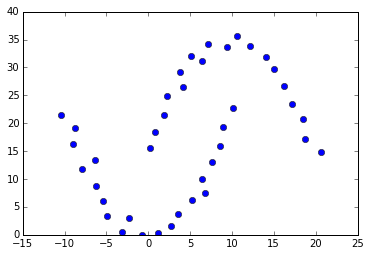

In [18]:
#prototyping
numP = 40

from sklearn.cluster import KMeans
X,Y,label,name = generateTwoParabola()
print 'first data:'
plotData(X,Y,label,name)

dataset = np.array([X, Y]).T
centers = Prototyping(dataset,numP)

print 'prototypes'
plt.plot(centers[:,0],centers[:,1],'bo')


numS = dataset.shape[0]
N = numS + numP

<h2 style="color:red">__Normalized Results__</h2>


images/Parabolas : eigenVectos M(1).jpg


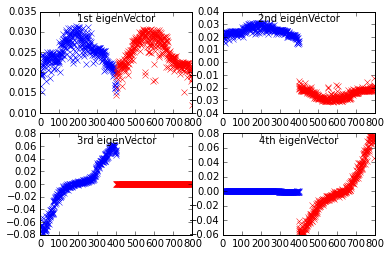

images/Parabolas new rep M(1).jpg


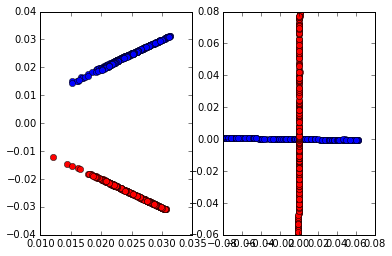

images/Parabolas eigenVal M(1).jpg


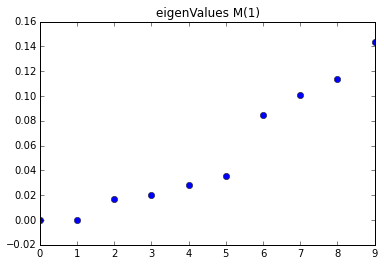

[ -4.48004459e-16   7.41933840e-05   1.65330322e-02   2.02399989e-02
   2.85211087e-02   3.55582228e-02   8.47019786e-02   1.00810116e-01
   1.13350907e-01   1.43888310e-01]


In [19]:
W,D,L = constructBipartite(dataset,numS,centers,numP)
eigenValues,eigenVectors = normalized3(W,D,L)
eigPlot(eigenValues[:numS],eigenVectors[:numS,:],label,'M(1)',name)

<h2 style="color:red">__Concentric__</h2>


first data:


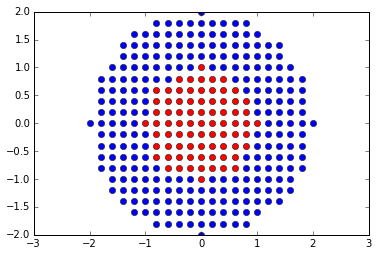

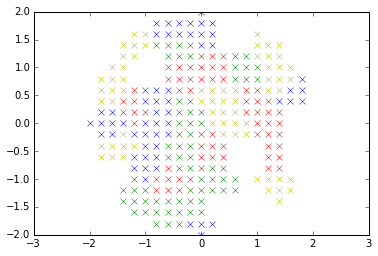

[ 6  7  9  9  9  7  6  9  8  8  4  9  7  8  7  6  9  9  7 10  9  7  9  6  8
  9  8  8 10  8  8  8  8  8  9  8  8  7  6  7]
prototypes


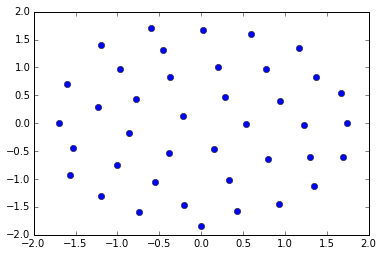

In [20]:
#prototyping
numP = 40

from sklearn.cluster import KMeans
X,Y,label,name = generateConcentric()
print 'first data:'
plotData(X,Y,label,name)

dataset = np.array([X, Y]).T
centers = Prototyping(dataset,numP)

print 'prototypes'
plt.plot(centers[:,0],centers[:,1],'bo')


numS = dataset.shape[0]
N = numS + numP

<h2 style="color:red">__Normalized Results__</h2>


images/Concentric : eigenVectos M(1).jpg


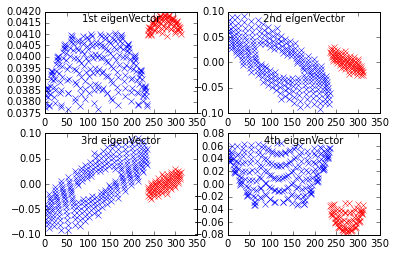

images/Concentric new rep M(1).jpg


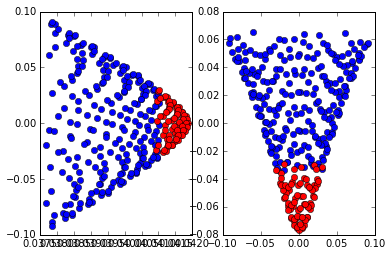

images/Concentric eigenVal M(1).jpg


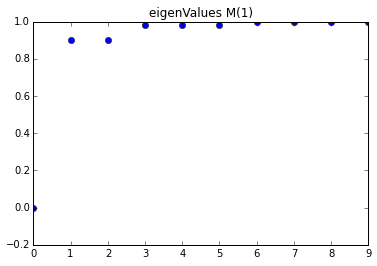

[ -1.33226763e-15   9.02521105e-01   9.03041702e-01   9.81961461e-01
   9.82829658e-01   9.83660512e-01   9.95937797e-01   9.96021121e-01
   9.96373951e-01   9.96534194e-01]


In [21]:
W,D,L = constructBipartite(dataset,numS,centers,numP)
eigenValues,eigenVectors = normalized3(W,D,L)
eigPlot(eigenValues[:numS],eigenVectors[:numS,:],label,'M(1)',name)

<h2 style="color:red">__XOR__</h2>


first data:


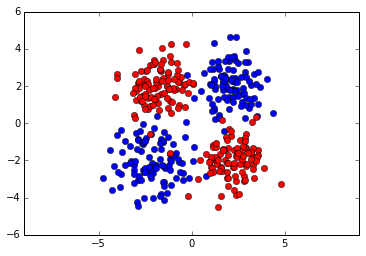

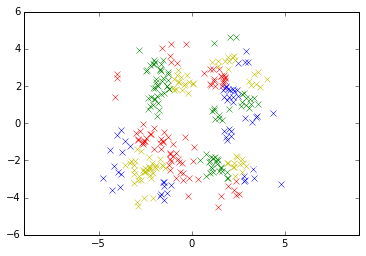

[15 10 17 17  7  8 18 10  9 14  6  6 11 11  7  5 13  8 14  4  4  7  3  6 17
  6  3 13 14 13  6 14 11 12 13  6  7 13 12 10]
prototypes


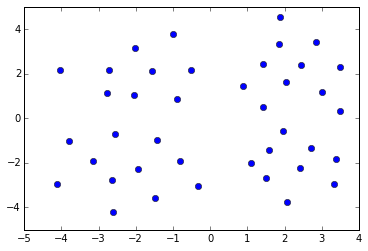

In [22]:
#prototyping
numP = 40

from sklearn.cluster import KMeans
X,Y,label,name = generateXOR()
print 'first data:'
plotData(X,Y,label,name)

dataset = np.array([X, Y]).T
centers = Prototyping(dataset,numP)

print 'prototypes'
plt.plot(centers[:,0],centers[:,1],'bo')


numS = dataset.shape[0]
N = numS + numP

<h2 style="color:red">__Normalized Results__</h2>


images/XOR : eigenVectos M(1).jpg


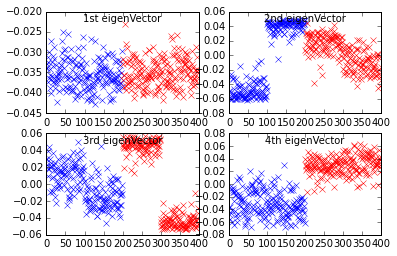

images/XOR new rep M(1).jpg


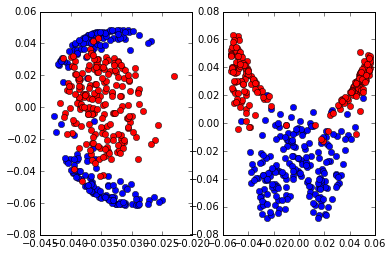

images/XOR eigenVal M(1).jpg


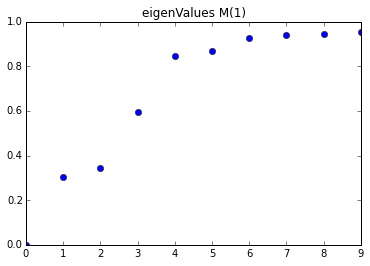

[  4.47992338e-16   3.04576112e-01   3.42555115e-01   5.94129915e-01
   8.44591646e-01   8.66581873e-01   9.24498809e-01   9.41841645e-01
   9.43167458e-01   9.51553266e-01]


In [23]:
W,D,L = constructBipartite(dataset,numS,centers,numP)
eigenValues,eigenVectors = normalized3(W,D,L)
eigPlot(eigenValues[:numS],eigenVectors[:numS,:],label,'M(1)',name)

In [105]:
def constructBipartite2(dataset,numS,centers,numP,y):
    numL = len(np.unique(sorted(y)))
    N = numS + numP + numL
    # constructing graph
    W = np.zeros((N,N))
    for i in range(numS):
        for j in range(numP):
            W[i,j+numS] = similarity((dataset[i,0],dataset[i,1]),(centers[j,0],centers[j,1]))
            W[j+numS,i] = W[i,j+numS]
    
    P = []
    for i in xrange(numL):
        P.append(sum(y==i))
        
    for i in xrange(y.shape[0]):
        W[i,numS+numP+y[i]] = 1./P[y[i]]
        W[numS+numP+y[i],i] = 1./P[y[i]]
        
    # construct laplacian
    D = np.diag(np.dot(W,np.ones(N)))
    L = D - W
    return W,D,L

<h1 style="color:purple">__Supervised__</h1>

<h2 style="color:red">__XOR__</h2>

first data:


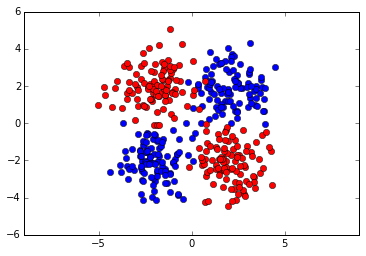

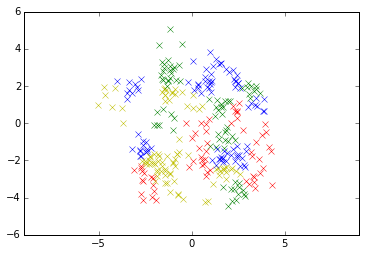

[14  5 12 16 15 11  6 12 11  7  8 11 10 12 14 15  5 13  9  6 10  8 10 10 13
 12  9  8  8  5  9  8 10  8 10 13  9  3  9 16]
prototypes


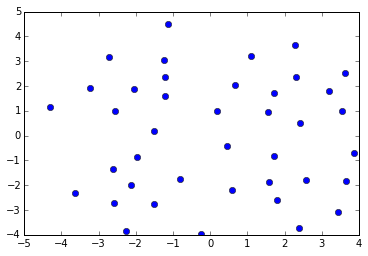

In [29]:
#prototyping
numP = 40

from sklearn.cluster import KMeans
X,Y,label,name = generateXOR()
print 'first data:'
plotData(X,Y,label,name)

dataset = np.array([X, Y]).T
centers = Prototyping(dataset,numP)

print 'prototypes'
plt.plot(centers[:,0],centers[:,1],'bo')


numS = dataset.shape[0]
N = numS + numP

images/supervisedXOR : eigenVectos M(1).jpg


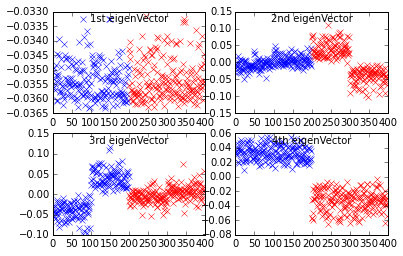

images/supervisedXOR new rep M(1).jpg


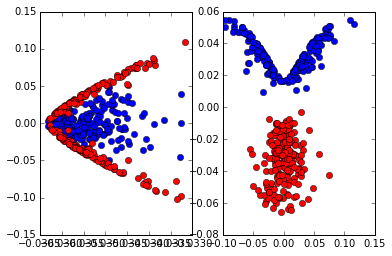

images/supervisedXOR eigenVal M(1).jpg


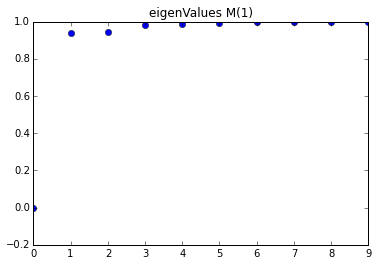

[ -1.33226763e-15   9.40399587e-01   9.43741003e-01   9.81403053e-01
   9.88224404e-01   9.92796820e-01   9.95243781e-01   9.96636884e-01
   9.97071911e-01   9.98553010e-01]


In [42]:
W,D,L = constructBipartite2(dataset,numS,centers,numP,label)
eigenValues,eigenVectors = normalized3(W,D,L)
eigPlot(eigenValues[:numS],eigenVectors[:numS,:],label,'M(1)','supervised'+name)

first data:


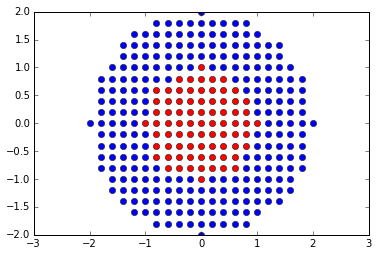

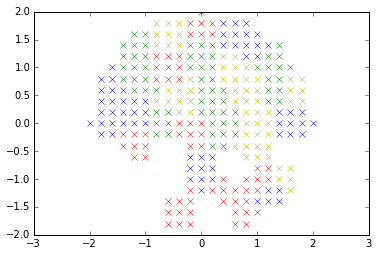

[ 9 10  6  7  7 10  8  8  9  6 10  9  6 10 10  6  6 10  9 10  8  6  7  6  9
  8 10  9  9  6  7  9  8  7  5  5  7  7  6  8]
prototypes


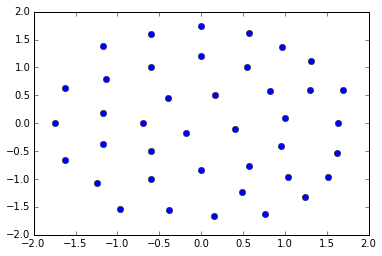

In [100]:
#prototyping
numP = 40

from sklearn.cluster import KMeans
X,Y,label,name = generateConcentric()
print 'first data:'
plotData(X,Y,label,name)

dataset = np.array([X, Y]).T
centers = Prototyping(dataset,numP)

print 'prototypes'
plt.plot(centers[:,0],centers[:,1],'bo')


numS = dataset.shape[0]
N = numS + numP

images/supervisedConcentric : eigenVectos M(1).jpg


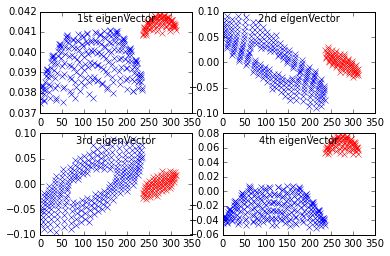

images/supervisedConcentric new rep M(1).jpg


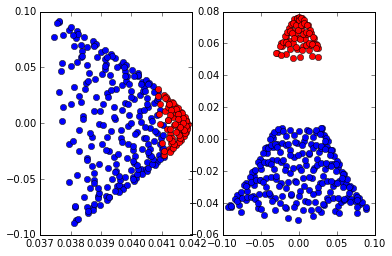

images/supervisedConcentric eigenVal M(1).jpg


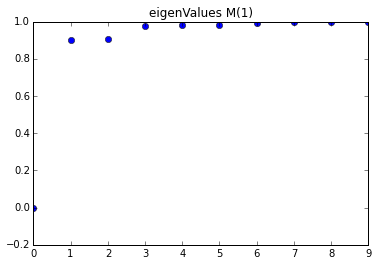

[ -4.44089210e-16   9.02769365e-01   9.05422134e-01   9.76719576e-01
   9.82687841e-01   9.84208250e-01   9.92030745e-01   9.95852998e-01
   9.96125941e-01   9.96515262e-01]


In [101]:
W,D,L = constructBipartite2(dataset,numS,centers,numP,label)
eigenValues,eigenVectors = normalized3(W,D,L)
eigPlot(eigenValues[:numS],eigenVectors[:numS,:],label,'M(1)','supervised'+name)

first data:


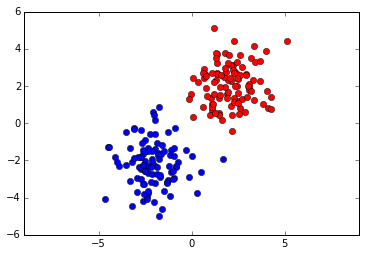

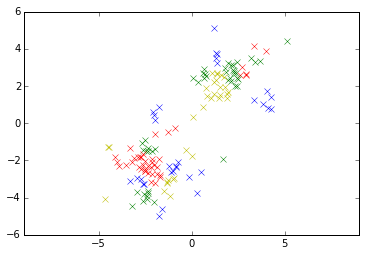

[ 6  9  9  9  4  4  9  2  9  2  6  8  4  5  7  5  1  3 10  7  4  1  6  4  1
  3  7  4  2  2  2  8  6  7  7  1  3  7  4  2]
prototypes


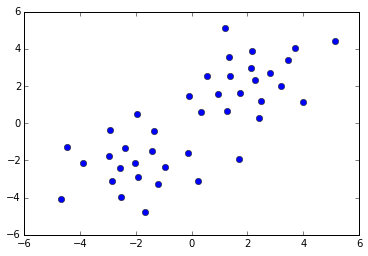

In [102]:
#prototyping
numP = 40

from sklearn.cluster import KMeans
X,Y,label,name = generateTwoGaussian()
print 'first data:'
plotData(X,Y,label,name)

dataset = np.array([X, Y]).T
centers = Prototyping(dataset,numP)

print 'prototypes'
plt.plot(centers[:,0],centers[:,1],'bo')


numS = dataset.shape[0]
N = numS + numP

images/supervisedGaussian : eigenVectos M(1).jpg


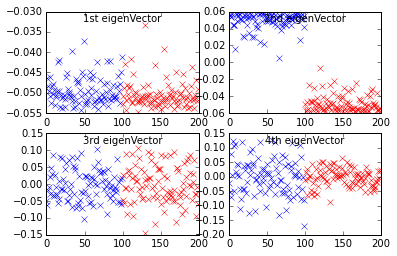

images/supervisedGaussian new rep M(1).jpg


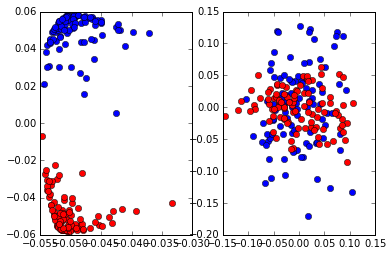

images/supervisedGaussian eigenVal M(1).jpg


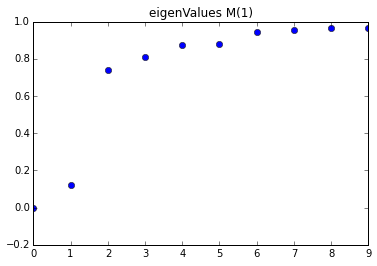

[ -7.14116347e-16   1.19610339e-01   7.41266118e-01   8.11231100e-01
   8.71908441e-01   8.77157816e-01   9.43289153e-01   9.55034290e-01
   9.63566754e-01   9.66336333e-01]


In [103]:
W,D,L = constructBipartite2(dataset,numS,centers,numP,label)
eigenValues,eigenVectors = normalized3(W,D,L)
eigPlot(eigenValues[:numS],eigenVectors[:numS,:],label,'M(1)','supervised'+name)

first data:


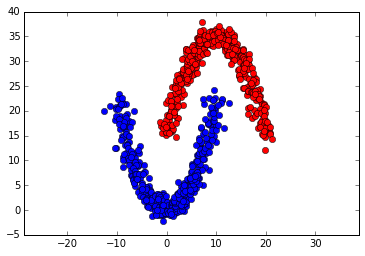

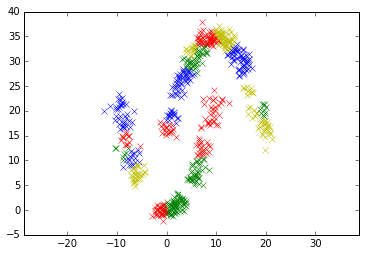

[31 25 18 21 25 20 23 16 14 36 16 33 21 11 16 16 39 38 24  8 17  7 16 13 27
 25 18 13 13 12 24 16 31 20 10 16 10 20 24 17]
prototypes


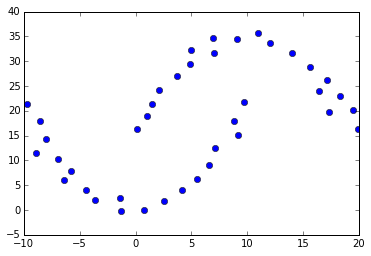

In [104]:
#prototyping
numP = 40

from sklearn.cluster import KMeans
X,Y,label,name = generateTwoParabola()
print 'first data:'
plotData(X,Y,label,name)

dataset = np.array([X, Y]).T
centers = Prototyping(dataset,numP)

print 'prototypes'
plt.plot(centers[:,0],centers[:,1],'bo')


numS = dataset.shape[0]
N = numS + numP

images/supervisedParabolas : eigenVectos M(1).jpg


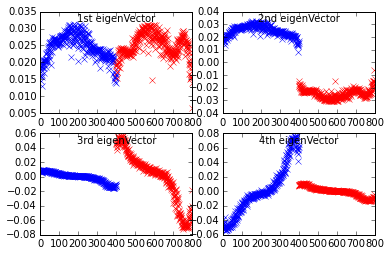

images/supervisedParabolas new rep M(1).jpg


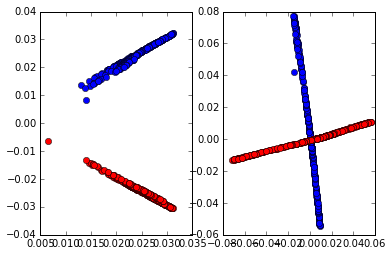

images/supervisedParabolas eigenVal M(1).jpg


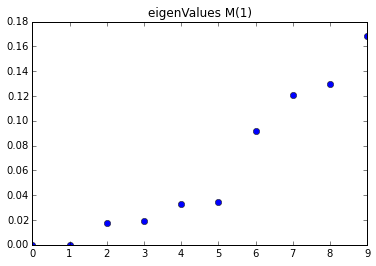

[  3.70475162e-16   1.41640273e-04   1.78222667e-02   1.93087807e-02
   3.28691630e-02   3.42307136e-02   9.21636857e-02   1.21207536e-01
   1.29640694e-01   1.68219524e-01]


In [105]:
W,D,L = constructBipartite2(dataset,numS,centers,numP,label)
eigenValues,eigenVectors = normalized3(W,D,L)
eigPlot(eigenValues[:numS],eigenVectors[:numS,:],label,'M(1)','supervised'+name)

first data:


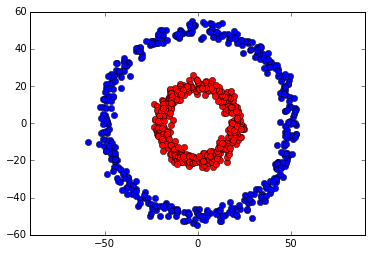

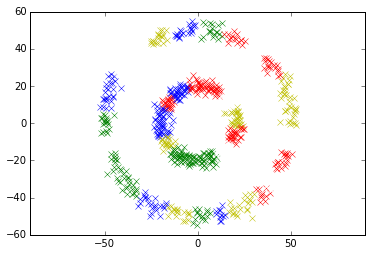

[29 28 34 12 19 23 10 19 14 34 12 25 16 15 20 21 31 22 18 13 38 18 18 18 18
 14 19 26 36 18 26 29 31 33 19 11 15 14 16  8]
prototypes


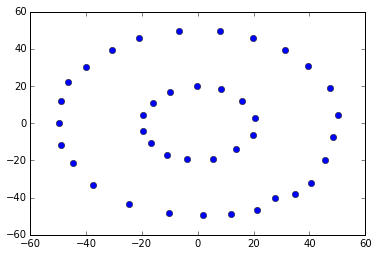

In [47]:
#prototyping
numP = 40

from sklearn.cluster import KMeans
X,Y,label,name = generateTwoDisks()
print 'first data:'
plotData(X,Y,label,name)

dataset = np.array([X, Y]).T
centers = Prototyping(dataset,numP)

print 'prototypes'
plt.plot(centers[:,0],centers[:,1],'bo')


numS = dataset.shape[0]
N = numS + numP

images/supervisedDisks : eigenVectos M(1).jpg


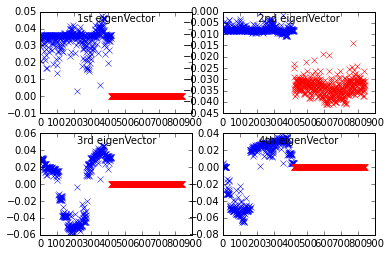

images/supervisedDisks new rep M(1).jpg


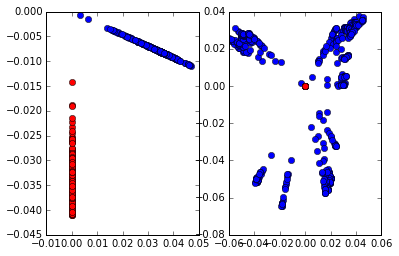

images/supervisedDisks eigenVal M(1).jpg


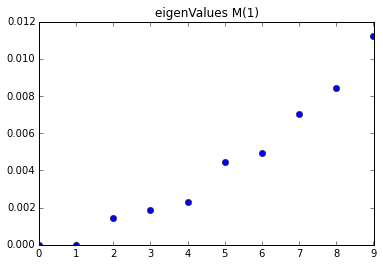

[  1.71652655e-16   2.98564793e-16   1.45790457e-03   1.89137230e-03
   2.29309874e-03   4.44578609e-03   4.94738897e-03   7.04079794e-03
   8.41044678e-03   1.12197937e-02]


In [56]:
def similarity(p1,p2):
    sigma = 30
    return np.exp((-distance2(p1,p2)**2)/(2*(sigma**2)))

W,D,L = constructBipartite2(dataset,numS,centers,numP,label)
eigenValues,eigenVectors = normalized3(W,D,L)
eigPlot(eigenValues[:numS],eigenVectors[:numS,:],label,'M(1)','supervised'+name)

images/Disks : eigenVectos M(1).jpg


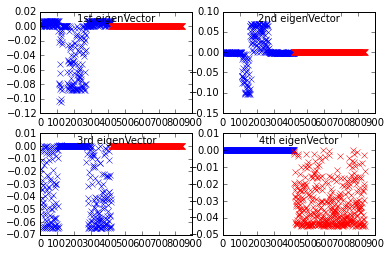

images/Disks new rep M(1).jpg


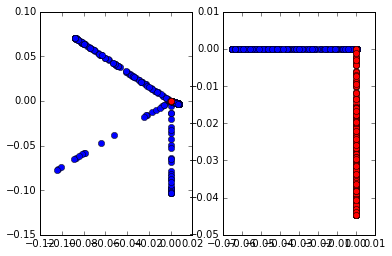

images/Disks eigenVal M(1).jpg


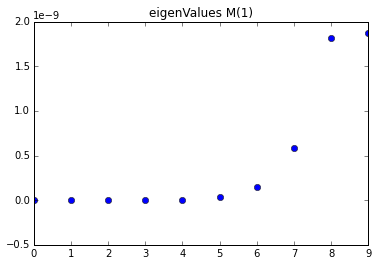

[ -1.60847321e-16   0.00000000e+00   7.98654275e-17   8.22493571e-17
   5.51127065e-16   3.24785557e-11   1.47647530e-10   5.81439477e-10
   1.81364022e-09   1.87180784e-09]


In [65]:
def similarity(p1,p2):
    sigma = 10
    return np.exp((-distance2(p1,p2)**2)/(2*(sigma**2)))

W,D,L = constructBipartite(dataset,numS,centers,numP)
eigenValues,eigenVectors = normalized3(W,D,L)
eigPlot(eigenValues[:numS],eigenVectors[:numS,:],label,'M(1)',name)

<h1 style="color:purple">__Other Methods__</h1>


In [26]:
from sklearn.decomposition import FastICA
def ICA(X):
    clf =  FastICA()
    clf.fit(X)
    newRep = clf.transform(X)
    return newRep

from sklearn.decomposition import PCA, KernelPCA
def KPCA(X):
    clf = KernelPCA(kernel="sigmoid", fit_inverse_transform=True, gamma=1)
    clf.fit(X)
    newRep = clf.transform(X)
    return newRep    

from sklearn.decomposition import PCA
def myPCA(X):
    clf = PCA()
    clf.fit(X)
    newRep = clf.transform(X)
    return newRep

from sklearn.lda import LDA
def myLDA(X,y):
    clf = LDA()
    clf.fit(X, y)
    newRep = clf.transform(X)
    return newRep

from sklearn import manifold
def myLLE(X):
    n_neighbors = 30
    clf = manifold.LocallyLinearEmbedding(n_neighbors, n_components=2,
                                      method='standard')
    clf.fit(X)
    newRep = clf.transform(X)
    return newRep

def myMDS(X):
    clf = manifold.MDS(n_components=2, n_init=1, max_iter=100)
    
    newRep = clf.fit_transform(X)
    return newRep

def myIsomap(X):
    n_neighbors = 30
    clf = manifold.Isomap(n_neighbors, n_components=2)
    clf.fit(X)
    newRep = clf.transform(X)
    return newRep

def myTSNE(X):
    clf = manifold.t_sne(n_components=4, init='pca', random_state=0)
    newRep = clf.fit_transform(X)
    return newRep

<h2 style="color:red">__XOR__</h2>

ICA


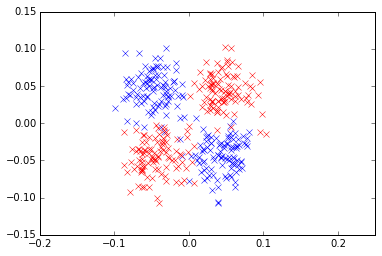

kernelPCA


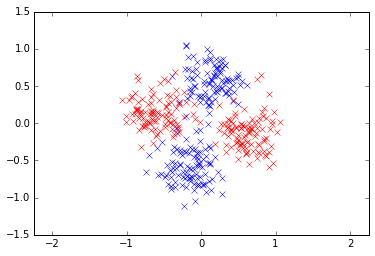

PCA


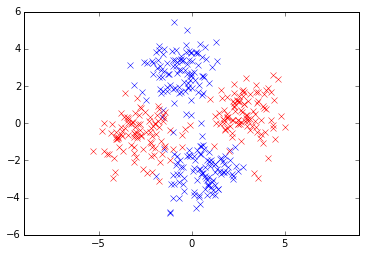

LDA


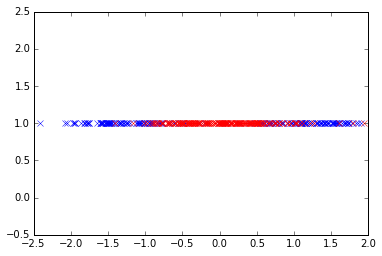

isomap


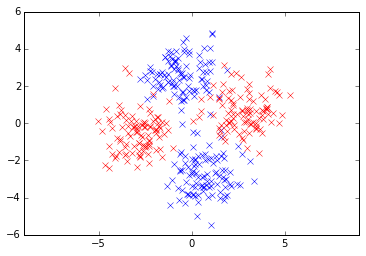

MDS


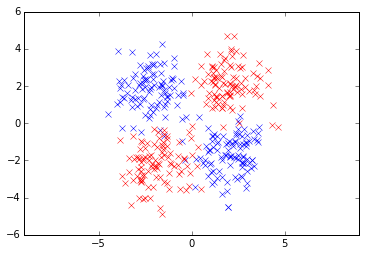

LLE


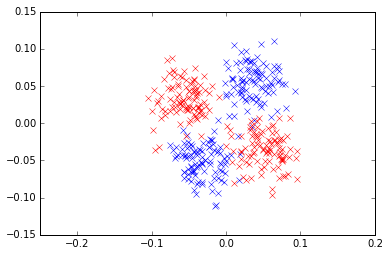

TypeError: 'module' object is not callable

In [35]:
x1,x2,y,name = generateXOR()
X = np.zeros((x1.shape[0],2))
X[:,0] = x1
X[:,1] = x2

newRep = ICA(X)
print 'ICA'
plotData2(newRep[:,0],newRep[:,1],y,'ICA_'+name)

newRep = KPCA(X)
print "kernelPCA"
plotData2(newRep[:,0],newRep[:,1],y,'KPCA_'+name)


newRep = myPCA(X)
print "PCA"
plotData2(newRep[:,0],newRep[:,1],y,'PCA_'+name)


newRep = myLDA(X,y)
print 'LDA'
plotData2(newRep[:,0],np.ones(newRep.shape[0]),y,'LDA_'+name)

newRep = myIsomap(X)
print "isomap"
plotData2(newRep[:,0],newRep[:,1],y,'isomap_'+name)

newRep = myMDS(X)
print "MDS"
plotData2(newRep[:,0],newRep[:,1],y,'MDS_'+name)

newRep = myLLE(X)
print "LLE"
plotData2(newRep[:,0],newRep[:,1],y,'LLE_'+name)

newRep = myTSNE(X)
print "TSNE"
plotData2(newRep[:,0],newRep[:,1],y,'TSNE_'+name)


<h2 style="color:red">__Concentric__</h2>

(313L,)
ICA


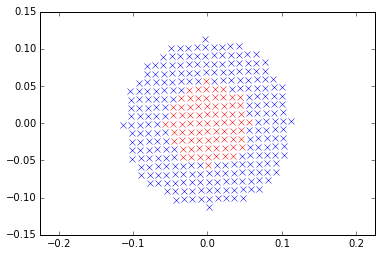

kernelPCA


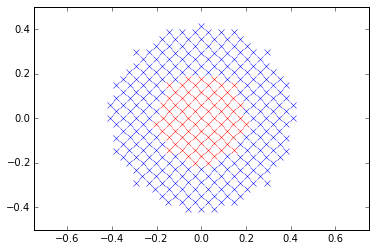

PCA


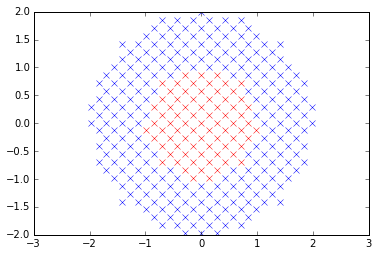

LDA


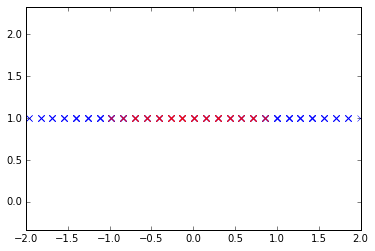

isomap


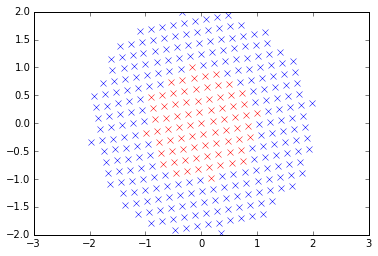

MDS


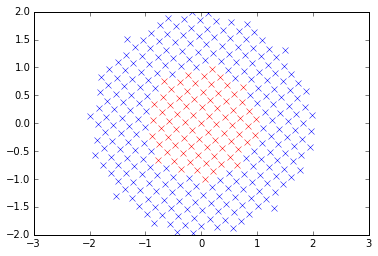

LLE


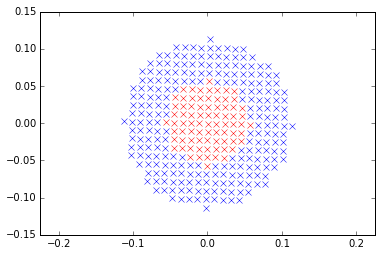

TypeError: 'module' object is not callable

In [36]:
x1,x2,y,name = generateConcentric()
X = np.zeros((x1.shape[0],2))
X[:,0] = x1
X[:,1] = x2
print x1.shape

newRep = ICA(X)
print 'ICA'
plotData2(newRep[:,0],newRep[:,1],y,'ICA_'+name)

newRep = KPCA(X)
print "kernelPCA"
plotData2(newRep[:,0],newRep[:,1],y,'KPCA_'+name)


newRep = myPCA(X)
print "PCA"
plotData2(newRep[:,0],newRep[:,1],y,'PCA_'+name)


newRep = myLDA(X,y)
print 'LDA'
plotData2(newRep[:,0],np.ones(newRep.shape[0]),y,'LDA_'+name)


newRep = myIsomap(X)
print "isomap"
plotData2(newRep[:,0],newRep[:,1],y,'isomap_'+name)

newRep = myMDS(X)
print "MDS"
plotData2(newRep[:,0],newRep[:,1],y,'MDS_'+name)

newRep = myLLE(X)
print "LLE"
plotData2(newRep[:,0],newRep[:,1],y,'LLE_'+name)


newRep = myTSNE(X)
print "TSNE"
plotData2(newRep[:,0],newRep[:,1],y,'TSNE_'+name)


ICA


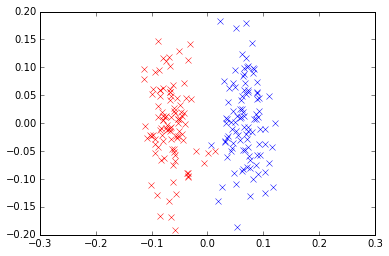

kernelPCA


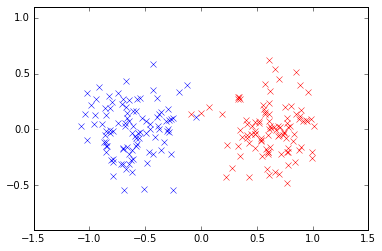

PCA


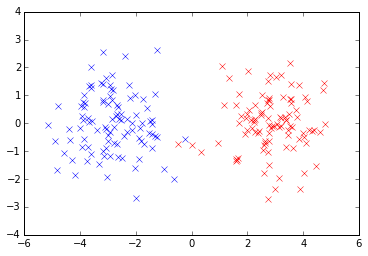

LDA


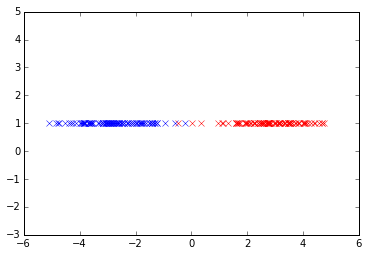

isomap


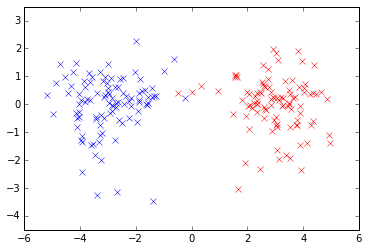

MDS


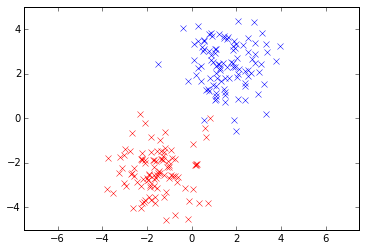

LLE


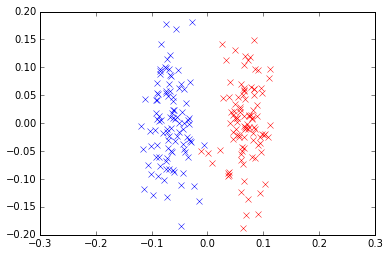

TypeError: 'module' object is not callable

In [37]:
x1,x2,y,name = generateTwoGaussian()
X = np.zeros((x1.shape[0],2))
X[:,0] = x1
X[:,1] = x2

newRep = ICA(X)
print 'ICA'
plotData2(newRep[:,0],newRep[:,1],y,'ICA_'+name)

newRep = KPCA(X)
print "kernelPCA"
plotData2(newRep[:,0],newRep[:,1],y,'KPCA_'+name)


newRep = myPCA(X)
print "PCA"
plotData2(newRep[:,0],newRep[:,1],y,'PCA_'+name)


newRep = myLDA(X,y)
print 'LDA'
plotData2(newRep[:,0],np.ones(newRep.shape[0]),y,'LDA_'+name)


newRep = myIsomap(X)
print "isomap"
plotData2(newRep[:,0],newRep[:,1],y,'isomap_'+name)

newRep = myMDS(X)
print "MDS"
plotData2(newRep[:,0],newRep[:,1],y,'MDS_'+name)

newRep = myLLE(X)
print "LLE"
plotData2(newRep[:,0],newRep[:,1],y,'LLE_'+name)


newRep = myTSNE(X)
print "TSNE"
plotData2(newRep[:,0],newRep[:,1],y,'TSNE_'+name)


kernelPCA


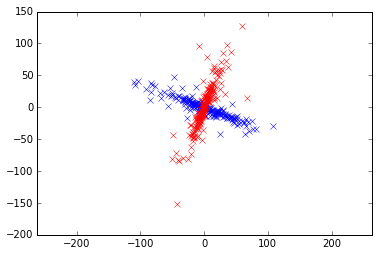

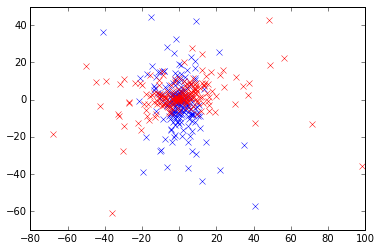

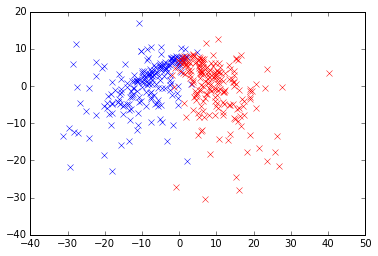

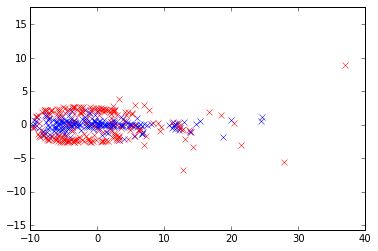

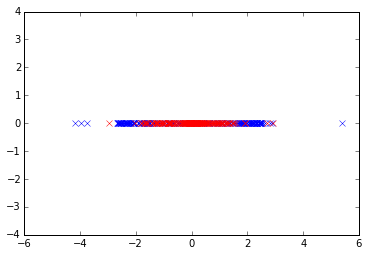

In [90]:
from sklearn.decomposition import PCA, KernelPCA
def KPCA(X):
    clf = KernelPCA(kernel="poly",gamma=1,n_components=10)# ,fit_inverse_transform=True)
    clf.fit(X)
    newRep = clf.transform(X)
    return newRep  

x1,x2,y,name = generateXOR()
X = np.zeros((x1.shape[0],2))
X[:,0] = x1
X[:,1] = x2

newRep = KPCA(X)
print "kernelPCA"
for i in xrange(0,newRep.shape[1],2):
    plotData2(newRep[:,i],newRep[:,i+1],y,'KPCA_'+name)


ICA


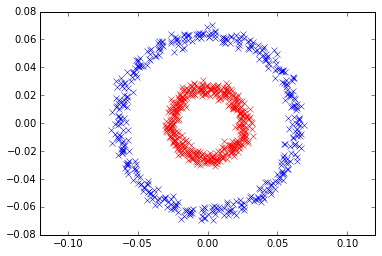

kernelPCA


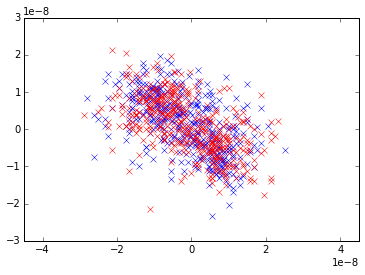

PCA


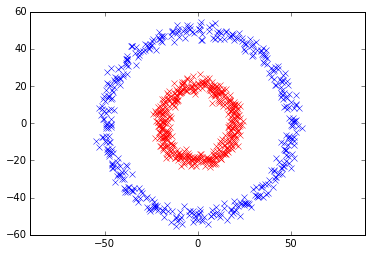

LDA


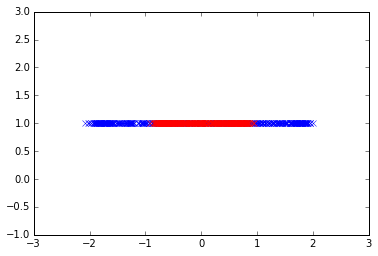

isomap


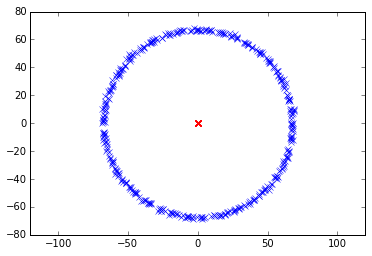

MDS


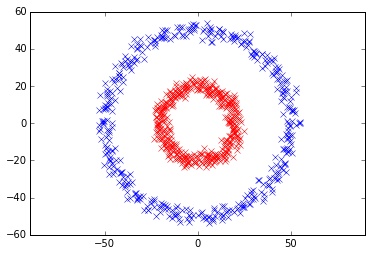

LLE


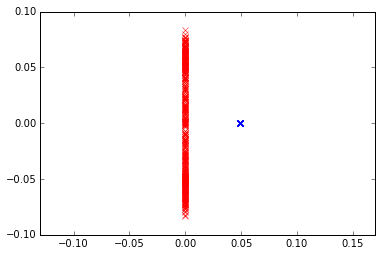

TypeError: 'module' object is not callable

In [64]:
x1,x2,y,name = generateTwoDisks()
X = np.zeros((x1.shape[0],2))
X[:,0] = x1
X[:,1] = x2

newRep = ICA(X)
print 'ICA'
plotData2(newRep[:,0],newRep[:,1],y,'ICA_'+name)

newRep = KPCA(X)
print "kernelPCA"
plotData2(newRep[:,0],newRep[:,1],y,'KPCA_'+name)


newRep = myPCA(X)
print "PCA"
plotData2(newRep[:,0],newRep[:,1],y,'PCA_'+name)


newRep = myLDA(X,y)
print 'LDA'
plotData2(newRep[:,0],np.ones(newRep.shape[0]),y,'LDA_'+name)


newRep = myIsomap(X)
print "isomap"
plotData2(newRep[:,0],newRep[:,1],y,'isomap_'+name)

newRep = myMDS(X)
print "MDS"
plotData2(newRep[:,0],newRep[:,1],y,'MDS_'+name)

newRep = myLLE(X)
print "LLE"
plotData2(newRep[:,0],newRep[:,1],y,'LLE_'+name)


newRep = myTSNE(X)
print "TSNE"
plotData2(newRep[:,0],newRep[:,1],y,'TSNE_'+name)


In [ ]:
x1,x2,y,name = generateTwoParabola()
X = np.zeros((x1.shape[0],2))
X[:,0] = x1
X[:,1] = x2

newRep = ICA(X)
print 'ICA'
plotData2(newRep[:,0],newRep[:,1],y,'ICA_'+name)

newRep = KPCA(X)
print "kernelPCA"
plotData2(newRep[:,0],newRep[:,1],y,'KPCA_'+name)


newRep = myPCA(X)
print "PCA"
plotData2(newRep[:,0],newRep[:,1],y,'PCA_'+name)


newRep = myLDA(X,y)
print 'LDA'
plotData2(newRep[:,0],np.ones(newRep.shape[0]),y,'LDA_'+name)


newRep = myIsomap(X)
print "isomap"
plotData2(newRep[:,0],newRep[:,1],y,'isomap_'+name)

newRep = myMDS(X)
print "MDS"
plotData2(newRep[:,0],newRep[:,1],y,'MDS_'+name)

newRep = myLLE(X)
print "LLE"
plotData2(newRep[:,0],newRep[:,1],y,'LLE_'+name)


newRep = myTSNE(X)
print "TSNE"
plotData2(newRep[:,0],newRep[:,1],y,'TSNE_'+name)


In [ ]:
cat,num,y = loadDermat2()

In [ ]:
cat

In [11]:
dermat.

,10,33,34,0_0,0_1,0_2,0_3,1_0,1_1,1_2,...,30_2,30_3,31_0,31_1,31_2,31_3,32_0,32_1,32_2,32_3
0,0,55,2,0,0,1,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
1,1,8,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2,0,26,3,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
3,0,40,1,0,0,1,0,0,0,1,...,0,0,0,0,0,1,1,0,0,0
4,0,45,3,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [12]:
dermat.columns

Index([10, 33, 34, u'0_0', u'0_1', u'0_2', u'0_3', u'1_0', u'1_1', u'1_2', u'1_3', u'2_0', u'2_1', u'2_2', u'2_3', u'3_0', u'3_1', u'3_2', u'3_3', u'4_0', u'4_1', u'4_2', u'4_3', u'5_0', u'5_1', u'5_2', u'5_3', u'6_0', u'6_1', u'6_2', u'6_3', u'7_0', u'7_1', u'7_2', u'7_3', u'8_0', u'8_1', u'8_2', u'8_3', u'9_0', u'9_1', u'9_2', u'9_3', u'11_0', u'11_1', u'11_2', u'11_3', u'12_0', u'12_1', u'12_2', u'13_0', u'13_1', u'13_2', u'13_3', u'14_0', u'14_1', u'14_2', u'14_3', u'15_0', u'15_1', u'15_2', u'15_3', u'16_0', u'16_1', u'16_2', u'16_3', u'17_0', u'17_1', u'17_2', u'17_3', u'18_0', u'18_1', u'18_2', u'18_3', u'19_0', u'19_1', u'19_2', u'19_3', u'20_0', u'20_1', u'20_2', u'20_3', u'21_0', u'21_1', u'21_2', u'21_3', u'22_0', u'22_1', u'22_2', u'22_3', u'23_0', u'23_1', u'23_2', u'23_3', u'24_0', u'24_1', u'24_2', u'24_3', u'25_0', u'25_1', ...], dtype='object')

In [21]:
a = ["Wine , 98. , 2.59  , 98.3 , 2.59 ,94.96 , 5.24 , 98.88 , 2.22 , 98.33 ,  2.54",
"Glass , 56.99 , 11.14 ,56.94 , 8 ,56.70 , 11.86 , 60.41 , 10.86 , 53.35 , 7.81",
"Iris , 92.66 , 6.28 , 98 , 3.05,96.66 , 6.14 , 95.33 , 5.20 , 96 , 4.42",
"WaweForm , 83.69 , 1.24 , 82.58 , 1.82 ,82.07,1.28 , 83.32 , 1.78 , 83.85 , 2.28",
"WDBC , 87.86 , 3.90 , 96.83 , 1.3,87.16 , 4.54 , 91.56 , 2.20 , 92.61 , 3.83",
"USPS , 65.87 , 1.22 ,  92.30 , .88,79.83 , 1.52 , 80.90 , 1.62 , 86.31 , 1.35",
"Sonar , 75.07 , 12.20 , 73.47 , 6.52 , 64.50 , 10.48 , 77.33 , 5.98 , 79.33 , 6.37"]

In [54]:
for s in a:
    print s.replace(" ","").split(',')

['Wine', '98.', '2.59', '98.3', '2.59', '94.96', '5.24', '98.88', '2.22', '98.33', '2.54']
['Glass', '56.99', '11.14', '56.94', '8', '56.70', '11.86', '60.41', '10.86', '53.35', '7.81']
['Iris', '92.66', '6.28', '98', '3.05', '96.66', '6.14', '95.33', '5.20', '96', '4.42']
['WaweForm', '83.69', '1.24', '82.58', '1.82', '82.07', '1.28', '83.32', '1.78', '83.85', '2.28']
['WDBC', '87.86', '3.90', '96.83', '1.3', '87.16', '4.54', '91.56', '2.20', '92.61', '3.83']
['USPS', '65.87', '1.22', '92.30', '.88', '79.83', '1.52', '80.90', '1.62', '86.31', '1.35']
['Sonar', '75.07', '12.20', '73.47', '6.52', '64.50', '10.48', '77.33', '5.98', '79.33', '6.37']


In [55]:
for s in a:
    k = s.replace(" ", "").split(',')
    print '<tr>'
    print '\t<td>$\\text{'+k[0]+'}$</td>'
    for i in xrange(1,len(k),2):
        print '\t<td>$\\text{'+k[i]+'} \\pm \\text{'+k[i+1]+'}$</td>'
    print '</tr>'
#     break

<tr>
	<td>$\text{Wine}$</td>
	<td>$\text{98.} \pm \text{2.59}$</td>
	<td>$\text{98.3} \pm \text{2.59}$</td>
	<td>$\text{94.96} \pm \text{5.24}$</td>
	<td>$\text{98.88} \pm \text{2.22}$</td>
	<td>$\text{98.33} \pm \text{2.54}$</td>
</tr>
<tr>
	<td>$\text{Glass}$</td>
	<td>$\text{56.99} \pm \text{11.14}$</td>
	<td>$\text{56.94} \pm \text{8}$</td>
	<td>$\text{56.70} \pm \text{11.86}$</td>
	<td>$\text{60.41} \pm \text{10.86}$</td>
	<td>$\text{53.35} \pm \text{7.81}$</td>
</tr>
<tr>
	<td>$\text{Iris}$</td>
	<td>$\text{92.66} \pm \text{6.28}$</td>
	<td>$\text{98} \pm \text{3.05}$</td>
	<td>$\text{96.66} \pm \text{6.14}$</td>
	<td>$\text{95.33} \pm \text{5.20}$</td>
	<td>$\text{96} \pm \text{4.42}$</td>
</tr>
<tr>
	<td>$\text{WaweForm}$</td>
	<td>$\text{83.69} \pm \text{1.24}$</td>
	<td>$\text{82.58} \pm \text{1.82}$</td>
	<td>$\text{82.07} \pm \text{1.28}$</td>
	<td>$\text{83.32} \pm \text{1.78}$</td>
	<td>$\text{83.85} \pm \text{2.28}$</td>
</tr>
<tr>
	<td>$\text{WDBC}$</td>
	<td>$\text{87.

In [58]:
a = ["Heart , 0.5569 ,0.0795 , 0.5259 ,0.1237 , 0.5623 ,0.0897 , 0.7325 ,0.0497 , 0.7617 ,0.0771"
,"Statlog , 0.6074 ,0.1196 , 0.7962 ,0.0763 , 0.7296 ,0.0620, 0.7518 ,0.0907 , 0.7555 ,0.0814"
,"German , 0.5596 ,0.0934 , 0.5131 ,0.0923 , 0.5333 ,0.0777 , 0.7199 ,0.0778 , 0.7150 ,0.0300"
,"Dermatology , 0.8742 ,0.0664 , 0.9607 ,0.0312 , 0.78499 ,0.0860, 0.8826 ,0.0708 , 0.9023 ,0.0849"]

In [59]:
for s in a:
    k = s.replace(" ", "").split(',')
    print '<tr>'
    print '\t<td>$\\text{'+k[0]+'}$</td>'
    for i in xrange(1,len(k),2):
        print '\t<td>$\\text{'+k[i]+'} \\pm \\text{'+k[i+1]+'}$</td>'
    print '</tr>'
#     break

<tr>
	<td>$\text{Heart}$</td>
	<td>$\text{0.5569} \pm \text{0.0795}$</td>
	<td>$\text{0.5259} \pm \text{0.1237}$</td>
	<td>$\text{0.5623} \pm \text{0.0897}$</td>
	<td>$\text{0.7325} \pm \text{0.0497}$</td>
	<td>$\text{0.7617} \pm \text{0.0771}$</td>
</tr>
<tr>
	<td>$\text{Statlog}$</td>
	<td>$\text{0.6074} \pm \text{0.1196}$</td>
	<td>$\text{0.7962} \pm \text{0.0763}$</td>
	<td>$\text{0.7296} \pm \text{0.0620}$</td>
	<td>$\text{0.7518} \pm \text{0.0907}$</td>
	<td>$\text{0.7555} \pm \text{0.0814}$</td>
</tr>
<tr>
	<td>$\text{German}$</td>
	<td>$\text{0.5596} \pm \text{0.0934}$</td>
	<td>$\text{0.5131} \pm \text{0.0923}$</td>
	<td>$\text{0.5333} \pm \text{0.0777}$</td>
	<td>$\text{0.7199} \pm \text{0.0778}$</td>
	<td>$\text{0.7150} \pm \text{0.0300}$</td>
</tr>
<tr>
	<td>$\text{Dermatology}$</td>
	<td>$\text{0.8742} \pm \text{0.0664}$</td>
	<td>$\text{0.9607} \pm \text{0.0312}$</td>
	<td>$\text{0.78499} \pm \text{0.0860}$</td>
	<td>$\text{0.8826} \pm \text{0.0708}$</td>
	<td>$\text{0.90